# Performance Analysis

In this notebook, we want to analyze the performance characteristics of the conway's game of life implementation. Most importantly, we want to develop an understanding of the compute needed to calculate the next generation.

Performance Metrics File: `perf.csv`

Command to Generate `perf.csv`: `cargo run --release -- -w 20000 -h 20000 -t --stats perf.csv`

In [54]:
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd

data = pd.read_csv("perf.csv")
data['delta_secs'] = data['delta_t'] / 1_000_000
data.head()

,gen,delta_t,alive,delta_secs
0,0,2850784,109415794,2.850784
1,1,2067765,101406403,2.067765
2,2,1653176,100205953,1.653176
3,3,1816972,95442475,1.816972
4,4,1715736,92846786,1.715736


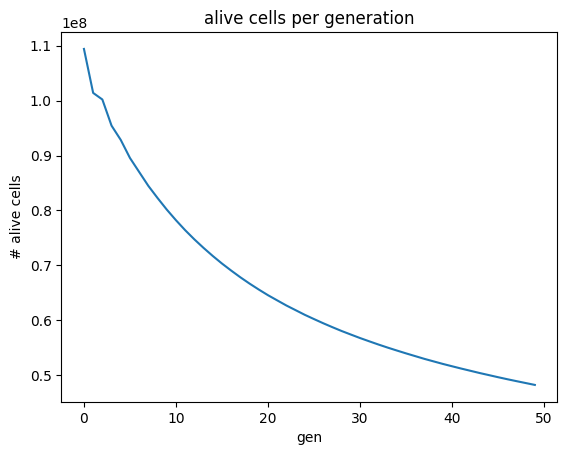

In [56]:
_ = data["alive"].plot(title="alive cells per generation", xlabel="gen", ylabel="# alive cells")

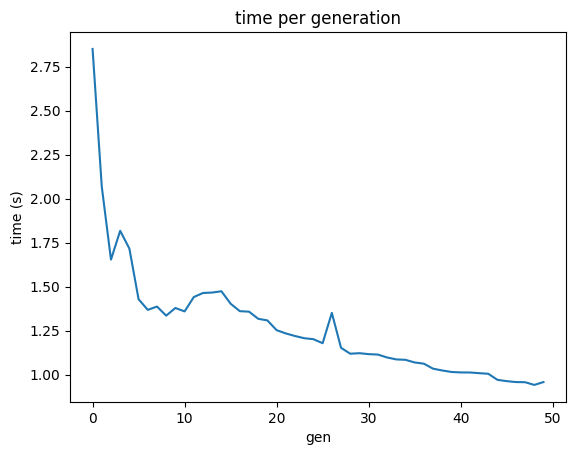

In [57]:
_ = data['delta_secs'].plot(title="time per generation", xlabel="gen", ylabel="time (s)")

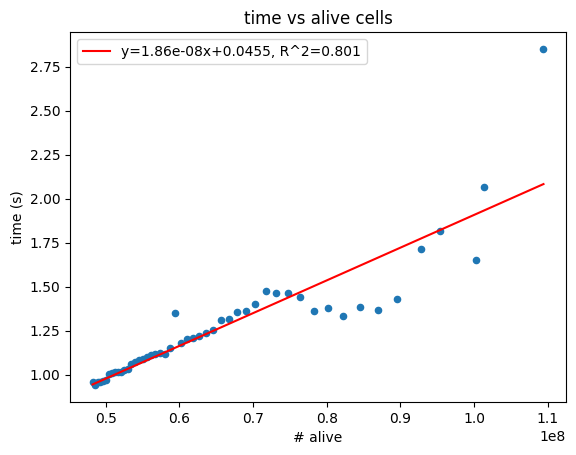

In [58]:
from scipy.stats import linregress

ax = data.plot.scatter(x='alive', y='delta_secs', title="time vs alive cells", xlabel="# alive", ylabel="time (s)")

x = data['alive'].to_numpy()
m, b, r, *_ = linregress(data['alive'], data['delta_secs'])
ax.plot(x, m*x + b, color="red", label=f'y={m:.3g}x+{b:.3g}, R^2={r**2:.3f}')
_ = ax.legend()

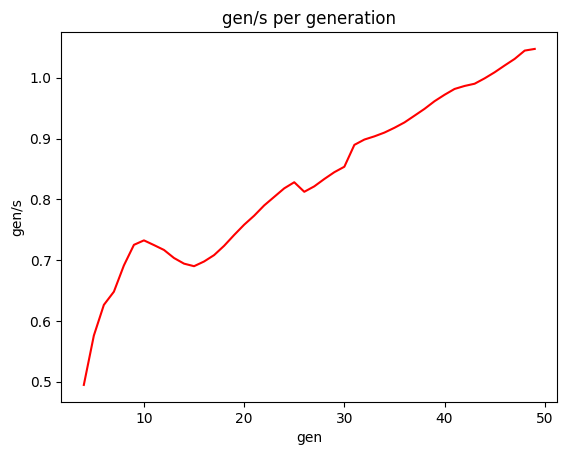

In [59]:
# rolling average to smooth graph
gens_per_sec = 1.0 / data['delta_secs'].rolling(window=5).mean()
_ = gens_per_sec.plot(title="gen/s per generation", xlabel="gen", ylabel="gen/s", color="r")